# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import sys
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
# your code here
df = pd.read_csv('..//data/absences.csv')
df = df.drop(columns='Unnamed: 0')
df

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


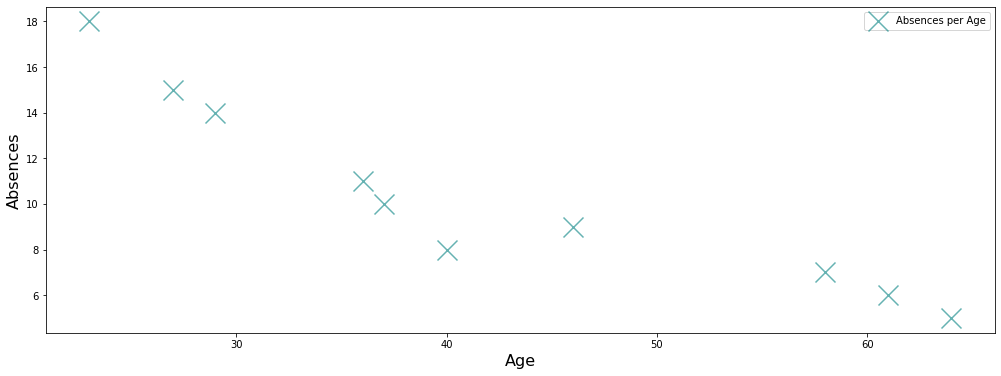

In [20]:
x = df.Age
y = df.Absences
plt.figure(figsize=(17,6))
plt.scatter(x,y, label='Absences per Age', s = 400,
            color='teal',edgecolor='black', 
            alpha=0.6,
            marker='x')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Absences', fontsize=16)
plt.legend()

In [4]:
# your comments here
'''
Age and number of absences seem to have a direct negative relation. 
Meaning the higher the age, the lower the absences.
'''

'\nAge and number of absences seem to have a direct negative relation. \nMeaning the higher the age, the lower the absences.\n'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [5]:
#Calculating means of X & Y

mean_age = sum(df['Age'])/len(df['Age'])
print(mean_age)

mean_absence = sum(df['Absences'])/len(df['Absences'])
print(mean_absence)

42.1
10.3


In [6]:
def slope(x,y):
    age_mean = sum(x)/len(x)
    absence_mean = sum(y)/len(y)    
    m=sum([(x[i]-age_mean)*(y[i]-absence_mean) for i in range(len(x))])/sum([(x[i]-absence_mean)**2 
                                                                                 for i in range(len(x))])
    
    # Y = - m * x --> b = y - ( m * x )
    b= absence_mean - (m * age_mean)
    
    return m,b

def reg_line(x,m, b):
    y= m*x + b
    return y

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [7]:
# Calculating regression line
m,b = slope(df['Age'],df['Absences'])
print(m,b)

reg_line(df['Age'][1], m,b)

-0.04309793929937838 12.114423244503831


9.48544894724175

In [10]:
## Creating a column in the data frame for all the regression line points
df["reg_line"] = df['Age'].apply(lambda x: reg_line(x, m,b))
df

,EmployeeID,Age,Absences,reg_line
0,1,27,15,10.950779
1,2,61,6,9.485449
2,3,37,10,10.519799
3,4,23,18,11.123171
4,5,46,9,10.131918
5,6,58,7,9.614743
6,7,29,14,10.864583
7,8,36,11,10.562897
8,9,64,5,9.356155
9,10,40,8,10.390506


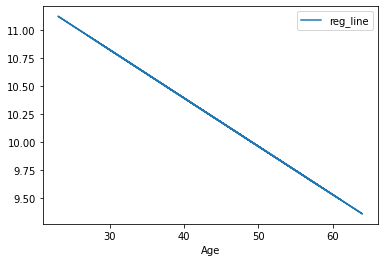

In [13]:
# Plotting age and regression line values
df.plot(x= 'Age', y='reg_line')


From the figure above we can conclude there's a direct negative relation between 'Age' and 'Absences'. The more
The 'Age' of the employee, the lower the 'Absences'


#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [36]:
def covar(x,y):
    x_mean_g = sum(x)/len(x)
    y_mean_g = sum(y)/len(y)  
    covar_x_y=0
    for i in x:
        covar_x_y += (x-x_mean_g)*(y-y_mean_g) / len(x)
    print('the covariance of X & Y is of', covar_x_y)
    return covar_x_y


In [49]:
def corr(x,y, covar):
    x_mean_c = sum(x)/len(x)
    y_mean_c = sum(y)/len(y)  
    stad_x = sum((x -x_mean_c)**2)/(len(x))**(1/2)
    
    y_mean_g = sum(y)/len(y)
    stad_y = sum((y -y_mean_c)**2)/(len(y))**(1/2)
    corr = covar/(stad_x * stad_y)
    print('correlation between X & Y is of', corr)
    return corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [50]:
# your code here
covar_age_absences = covar(df.Age, df.Absences)

the covariance of X & Y is of 0    -70.97
1    -81.27
2      1.53
3   -147.07
4     -5.07
5    -52.47
6    -48.47
7     -4.27
8   -116.07
9      4.83
dtype: float64


In [51]:
# your comments here
corr_age_abssence = corr(df.Age, df.Absences, covar_age_absences)

correlation between X & Y is of 0   -0.002289
1   -0.002621
2    0.000049
3   -0.004743
4   -0.000163
5   -0.001692
6   -0.001563
7   -0.000138
8   -0.003743
9    0.000156
dtype: float64


# Analysis
As the scales of the variables compared differ (Age, Absences) it is not advised to use the covariance to state relationship between them.
Instead, I would suggest using the correlation coefficient, in this case of -0.002289 which interpreted would mean
that Age and Absences have a weak negative correlation.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

From the data we can't conclude that Age is a clear indicator of absenteeism. We would need a bigger set of data to be able to conclude that.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [53]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [58]:
# your code here
x_mean = sum(ironbeers_df['X'])/len(ironbeers_df['X'])

y_mean = sum(ironbeers_df['Y'])/len(ironbeers_df['Y'])


covariance_x_y = 0

for i in range(len(ironbeers_df['X'])):
    covariance_x_y += (1/(len(ironbeers_df['X'])))*((ironbeers_df['X'][i]-x_mean))*((ironbeers_df['Y'][i]-y_mean))
print('the covariance of People told & People that stayed is of', covariance_x_y)

the covariance of People told & People that stayed is of 10.5


In [59]:
std_x = 0
std_x += ((sum([(i - x_mean)**2 for i in ironbeers_df['X']]))/(len(ironbeers_df['X'])))**(1/2)

print('the standard deviation of People told is of', std_x)    

#Standard deviation of Y
# y_mean
std_y = 0
# for i in ironbeers_df['Y']:
std_y += ((sum([(i - y_mean)**2 for i in ironbeers_df['Y']]))/(len(ironbeers_df['Y'])))**(1/2)
print('the standard deviation of People that stayed is of', std_y)

the standard deviation of People told is of 4.06201920231798
the standard deviation of People that stayed is of 2.6457513110645907


In [61]:
corr_x_y = covariance_x_y /(std_x * std_y)

print('the correlation of People told & People that stayed is of', corr_x_y)

the correlation of People told & People that stayed is of 0.9770084209183942


# Analysis
There's a strong positive correlation between telling people to stay and people staying :) 


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

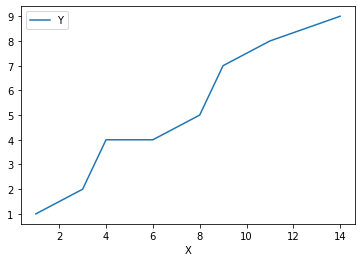

In [62]:
# your code here
ironbeers_plot = ironbeers_df.plot('X', 'Y')

By the correlation coefficient of 0.97 and the plot we can confirm there's a strong relationship between telling people to stay and people staying.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [67]:
m_beer, b_beer = slope(ironbeers_df['X'], ironbeers_df['Y'])


In [70]:
# your comments here
ironbeers_df['Y_regression_points'] = ironbeers_df['X'].apply(lambda x: reg_line(x, m_beer,b_beer))
ironbeers_df

,X,Y,Y_regression_points
0,1,1,1.926829
1,3,2,2.951220
2,4,4,3.463415
3,6,4,4.487805
4,8,5,5.512195
5,9,7,6.024390
6,11,8,7.048780
7,14,9,8.585366


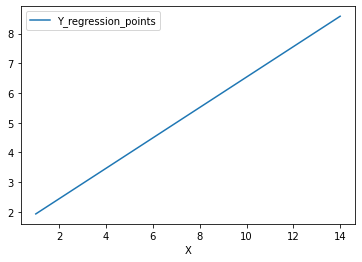

In [71]:
ironbeers_df.plot(x='X', y = 'Y_regression_points')

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

I'm totally not the reason why people is not staying on Fridays. 


## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here